# The flatness problem without inflation

In a homogeneous, isotropic universe described by the Friedmann–Robertson–Walker (FRW) metric, the first Friedmann equation is  
(in units where $c = 1$):

$$
H^2 = \frac{8\pi G}{3}\,\rho - \frac{k}{a^2},
$$

where

- $H = \dot{a}/a$ is the Hubble parameter,
- $a(t)$ is the scale factor,
- $\rho$ is the total energy density,
- $k = +1, 0, -1$ encodes the spatial curvature (closed, flat, open).

We define the *critical density* and density parameters in the usual way:

$$
\rho_{\rm crit} \equiv \frac{3H^2}{8\pi G}, \qquad
\Omega_i \equiv \frac{\rho_i}{\rho_{\rm crit}}, \qquad
\Omega_k \equiv -\frac{k}{(aH)^2}.
$$

The flatness parameter $\Omega_k$ measures how curved space is. A perfectly flat universe has $\Omega_k = 0$. Observationally, today we have $|\Omega_k| \ll 1$, i.e. the universe is *very* close to spatially flat.


## Observational evidence that the universe is flat: Type Ia supernovae

Type Ia supernovae are powerful **standardisable candles**: after applying empirical corrections for their light-curve shape and colour, they all have (approximately) the same absolute magnitude $M$.

Let's consider the SNIa data that we analysed in the coursework. First let's load it up:



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

# Only needed on Colab
if "COLAB_GPU" in os.environ or "COLAB_TPU_ADDR" in os.environ:
    repo_name = "flatness_inflation_nb"
    if not os.path.exists(repo_name):
        !git clone https://github.com/ajw278/flatness_inflation_nb.git
    os.chdir(repo_name)

# 1. Load the Type Ia SN data
# Make sure the CSV is in the same directory as the notebook,
# or adjust the path accordingly.
fname = "Type-Ia-Supernova-Data.csv"
sn = pd.read_csv(fname)

# Quick peek at the first few rows (optional)
display(sn.head())

,supernova name,redshift,magnitude,stretch,color
0,03D1au,0.503084,23.001698,1.273191,-0.012353
1,03D1aw,0.580724,23.573937,0.974346,-0.025076
2,03D1ax,0.494795,22.960139,-0.728837,-0.099683
3,03D1bp,0.345928,22.398137,-1.155110,-0.040581
4,03D1co,0.677662,24.078115,0.618820,-0.039380


For each supernova in our sample we have:

- redshift $z$  
- an **uncorrected** apparent magnitude $m_\text{uncorr}$  
- a stretch parameter $s$ (how broad the light curve is)  
- a colour parameter $C$ (how blue/red the supernova appears)

Empirically, broader (higher $s$) supernovae are intrinsically brighter, and redder (higher $C$) ones are dimmer, mainly due to dust. We account for this with a linear correction

$$
m_\text{corr} \approx m_\text{uncorr}
  + 0.14\,(s - 1)
  - 3.1\,C,
$$

where $m_\text{corr}$ is the **standardised** apparent magnitude we will use in the Hubble diagram. Let's do this correction by adding a corrected column to our data:


In [109]:
# Standardisation:
# m_corr ≈ m_uncorr + 0.14*(s - 1) - 3.1*C
sn["m_corr"] = (
    sn["magnitude"]
    + 0.14 * (sn["stretch"] - 1.0)
    - 3.1 * sn["color"]
)



### Distance modulus and luminosity distance

Once we have $m_\text{corr}$, we can relate it to the luminosity distance $d_L$ through the usual distance modulus relation

$$
\mu \equiv m_\text{corr} - M
  = 5 \log_{10}\!\left(\frac{d_L}{10~\mathrm{pc}}\right),
$$

where

- $M$ is the absolute magnitude of a standardised Type Ia supernova, which we take to be
  $$
  M \approx -19.3,
  $$
- $d_L$ is the luminosity distance.

Rearranging this,

$$
d_L = 10^{\,(\mu/5 + 1)}~\mathrm{pc}
    = 10^{\,((\mu - 25)/5)}~\mathrm{Mpc}.
$$

In [110]:
# Adopt an absolute magnitude for standardised SNe Ia
M = -19.3

# Distance modulus μ = m_corr - M
sn["mu"] = sn["m_corr"] - M

# Compute luminosity distance in Mpc:
# d_L [Mpc] = 10^((μ - 25)/5)
sn["dL_Mpc"] = 10 ** ((sn["mu"] - 25.0) / 5.0)

Now let's see how this data looks:

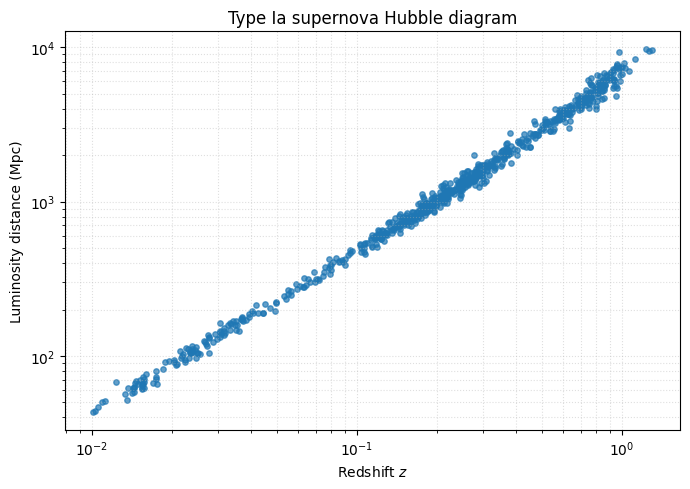

In [111]:
fig, ax = plt.subplots(figsize=(7, 5))

# Filter out any non-positive redshifts just in case
mask = sn["redshift"] > 0
z = sn.loc[mask, "redshift"]
distance = sn.loc[mask, "dL_Mpc"]

ax.scatter(z, distance, s=15, alpha=0.7)

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"Redshift $z$")
ax.set_ylabel(r"Luminosity distance (Mpc)")
ax.set_title("Type Ia supernova Hubble diagram")

# Optional: add a grid for readability
ax.grid(True, which="both", ls=":", alpha=0.4)

plt.tight_layout()
plt.show()

## The distance–redshift relation in a general FRW universe

To connect our Type Ia supernova Hubble diagram to cosmology, we need to relate the **luminosity distance** $d_L$ to the **redshift** $z$ for a general Friedmann–Robertson–Walker (FRW) universe with matter, radiation, curvature, and dark energy.

---

### FRW metric and comoving distance

We start from the FRW line element
$$
ds^2 = -c^2 dt^2 + a^2(t)\left[\frac{dr^2}{1-kr^2} + r^2 \bigl(d\theta^2+\sin^2\theta\,d\phi^2\bigr)\right].
$$

Light follows a null trajectory, $ds^2=0$. For a light ray travelling radially ($d\theta=d\phi=0$) this gives
$$
\frac{c\,dt}{a(t)}=-\frac{dr}{\sqrt{1-kr^2}}.
$$

For a photon emitted at coordinate radius $r=r_e$ and time $t_e$, travelling towards us at the origin ($r=0$) at the present time $t_0$, we define the **comoving radial distance**
$$
\chi \equiv \int_0^{r_e} \frac{dr'}{\sqrt{1-kr'^2}}
= \int_{t_e}^{t_0} \frac{c\,dt}{a(t)}.
$$

Using $H \equiv \dot{a}/a$ and $1+z = a_0/a(t)$, we have
$$
\frac{dt}{a} = \frac{da}{a^2H}= - \frac{dz}{a_0 H}.
$$
Hence
$$
\chi(z) = c\int_{t_e}^{t_0} \frac{dt}{a(t)}
       = \frac{c}{a_0}\int_0^{z} \frac{dz'}{H(z')}
       = c\int_0^{z} \frac{dz'}{H(z')},
$$
where in the last equality we set $a_0=1$.

The Friedmann equation can be written as
$$
H^2(z) = H_0^2\left[ \Omega_{r,0}(1+z)^4 + \Omega_{m,0}(1+z)^3 + \Omega_{k,0}(1+z)^2+ \Omega_{\Lambda,0}
\right].
$$

Let's define $E(z) \equiv H/H_0$, and recall that in a homogeneous, isotropic FRW universe, the first Friedmann equation today can be written in terms of the density parameters as:
$$
1= \Omega_{m,0}+ \Omega_{r,0}+ \Omega_{\Lambda,0}+ \Omega_{k,0},
$$



In [112]:
def E_z(z, Omega_r0=1e-4, Omega_m0=0.3, Omega_L0=0.7):
    """
    Normalised Hubble parameter E(z) = H(z)/H0
    """
    Omega_k0 = 1.- Omega_r0 -Omega_m0-Omega_L0
    z = np.asarray(z)
    return np.sqrt(
        Omega_r0 * (1 + z)**4 +
        Omega_m0 * (1 + z)**3 +
        Omega_k0 * (1 + z)**2 +
        Omega_L0
    )

Then we have:
$$
\chi(z) = \frac{c}{H_0}
\int_0^z
\frac{dz'}{\sqrt{
\Omega_{r,0}(1+z')^4 + \Omega_{m,0}(1+z')^3 + \Omega_{k,0}(1+z')^2 + \Omega_{\Lambda,0}}} =   \frac{c}{H_0} \int_0^z \frac{dz'}{E(z)},
$$

In [113]:
def comoving_chi(z,  n_steps=2000, **Omega):
    """
    Dimensionless comoving radial distance chi(z) = ∫_0^z dz'/E(z').
    We do a simple trapezoidal integral on a grid.

    Returns chi(z) as an array matching the shape of z.
    """
    z = np.atleast_1d(z)
    z_max = z.max()

    # Integration grid from 0 to max(z)
    z_grid = np.linspace(0.0, z_max, n_steps)
    integrand = 1.0 / E_z(z_grid, **Omega)

    chi_grid = np.zeros_like(z_grid)
    chi_grid[1:] = np.cumsum(
        0.5 * (integrand[1:] + integrand[:-1]) * np.diff(z_grid)
    )

    # Interpolate chi(z) from chi_grid(z_grid)
    chi = np.interp(z, z_grid, chi_grid)
    return chi


From the definition, we also have:
$$
\chi \equiv \int_0^{r_e} \frac{dr'}{\sqrt{1-kr'^2}},
$$
one can show that
$$
r_e  = S_k(\chi) \equiv
\begin{cases}
\displaystyle \frac{1}{\sqrt{k}} \sin(\sqrt{k}\,\chi), & k>0,\\[6pt]
\chi, & k=0,\\[4pt]
\displaystyle \frac{1}{\sqrt{-k}} \sinh(\sqrt{-k}\,\chi), & k<0.
\end{cases}
$$

Finally, the distance luminosity follows:
$$
\boxed{d_L(z) = (1+z)\,r_e = (1+z)\,S_k(\chi)} .
$$

Let's see how this looks in a Hubble diagram...

In [114]:
# Hubble constant and speed of light
H0 = 70.0          # km/s/Mpc
c = 299792.458     # km/s

def luminosity_distance(z, **Omegas):
    """
    Luminosity distance d_L(z) in Mpc for the given cosmology.

    Uses:
        r_e(z) = (c/H0) * S_k(chi),
        d_L(z) = (1+z) * D_M(z),
    with chi dimensionless and curvature encoded by Omega_k0.
    """
    z = np.atleast_1d(z)
    chi = comoving_chi(z, **Omegas)  # dimensionless

    if np.isclose(Omega_k0, 0.0):
        # Spatially flat: S_k(chi) = chi
        r_e = (c / H0) * chi
    elif Omega_k0 > 0.0:
        # Open universe: S_k(chi) = (1/sqrt(Ω_k0)) sinh(sqrt(Ω_k0) chi)
        sqrt_ok = np.sqrt(Omega_k0)
        r_e = (c / H0) / sqrt_ok * np.sinh(sqrt_ok * chi)
    else:
        # Closed universe: S_k(chi) = (1/sqrt(|Ω_k0|)) sin(sqrt(|Ω_k0|) chi)
        sqrt_ok = np.sqrt(-Omega_k0)
        r_e = (c / H0) / sqrt_ok * np.sin(sqrt_ok * chi)

    d_L = (1.0 + z) * r_e  # in Mpc
    return d_L

Let's consider a matter and curvature only universe with our constraints on matter from e.g. CMB structure:   
$$
  \Omega_{m,0} \approx 0.3.
$$

In [115]:
# Cosmological parameters (matter + curvature only)
Omega_m0 = 0.3
Omega_r0 = 0.0
Omega_L0 = 0.0
Omega_k0 = 1.0 - Omega_m0 - Omega_r0 - Omega_L0  # = 0.7

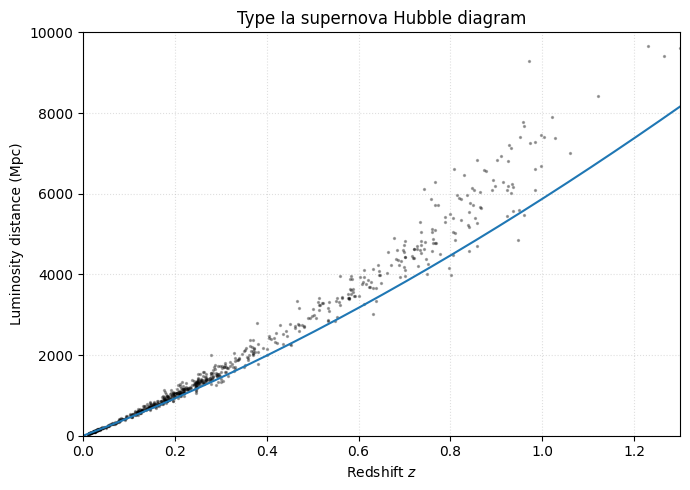

In [116]:
# Redshift grid
z_grid = np.linspace(1e-3, 2.0, 200)

# Luminosity distance in Mpc
dL_Mpc_theory = luminosity_distance(z_plot, Omega_m0=Omega_m0, Omega_r0=Omega_r0, Omega_L0=Omega_L0)

fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(z_grid, dL_Mpc_theory)


ax.scatter(z, distance, s=2, alpha=0.3, c='k')


ax.set_xlabel(r"Redshift $z$")
ax.set_ylabel(r"Luminosity distance (Mpc)")
ax.set_title("Type Ia supernova Hubble diagram")

# Optional: add a grid for readability
ax.grid(True, which="both", ls=":", alpha=0.4)
ax.set_xlim([0.0, 1.3])
ax.set_ylim([0.0, 1e4])

plt.tight_layout()
plt.show()

There is something not right... we're not fitting the highest redshift SNe! Perhaps we need another component $\Omega_\Lambda \neq 0$...

In [46]:
from ipywidgets import interact, FloatSlider

# Redshift grid for the theory curve
z_grid = np.linspace(1e-3, 2.0, 200)

Omega_m0 = 0.3
Omega_r0 = 0.0

@interact(
    Omega_L0=FloatSlider(
        value=0.0, min=0.0, max=1.2, step=0.05,
        description=r'$\Omega_{\Lambda,0}$'
    )
)
def plot_hubble(Omega_L0):
    # Theoretical d_L(z) for given Ω_Λ,0
    dL_Mpc_theory = luminosity_distance(
        z_grid,
        Omega_m0=Omega_m0,
        Omega_r0=Omega_r0,
        Omega_L0=Omega_L0
    )

    # Corresponding curvature
    Omega_k0 = 1.0 - Omega_m0 - Omega_r0 - Omega_L0

    fig, ax = plt.subplots(figsize=(7, 5))

    ax.plot(
        z_grid, dL_Mpc_theory,
        label=rf"theory: $\Omega_{{m,0}}={Omega_m0}$, $\Omega_{{\Lambda,0}}={Omega_L0:.2f}$, "
              rf"$\Omega_{{k,0}}={Omega_k0:.2f}$"
    )

    # Supernova data points (already computed)
    ax.scatter(z, distance, s=2, alpha=0.3, c='k', label="SNe Ia")

    ax.set_xlabel(r"Redshift $z$")
    ax.set_ylabel(r"Luminosity distance $d_L$ (Mpc)")
    ax.set_title("Type Ia supernova Hubble diagram with varying $\Omega_{\Lambda,0}$")

    ax.grid(True, which="both", ls=":", alpha=0.4)
    ax.set_xlim([0.0, 1.3])
    ax.set_ylim([0.0, 1e4])
    ax.legend(loc="upper left", fontsize=9)

    plt.tight_layout()
    plt.show()


interactive(children=(FloatSlider(value=0.0, description='$\\Omega_{\\Lambda,0}$', max=1.2, step=0.05), Output…

Using the above slider, check what $\Omega_\Lambda$ is needed to explain the SNe data. 


## How close is the Universe to flat today?

So if **only** matter (including dark matter) and radiation contributed to the energy budget today, the curvature term would have to be
$$
\Omega_{k,0} \approx 0.7,
$$
corresponding to a *strongly open* universe with large negative spatial curvature. This does not agree with the evidence -- for example, from SNIa supernovae. Different cosmological probes are sensitive to the geometry of the Universe, combining these suggest $\Omega_\Lambda \approx 0.7$, and a universe which is very close to flat with current constraints typically at the level of
$$
|\Omega_{k,0}| \lesssim \text{a few} \times 10^{-3},
$$
i.e. consistent with zero curvature to better than a percent in $\Omega$.

## The flatness problem 

Given observational constraints, we can consider what this implies for the  curvature of the universe at recombination ($z=1100$) for example. To do this, we have to work out how curvature evolves.

Consider a total density parameter $\Omega_\mathrm{tot}$ that includes everything except curvature. The curvature density parameter is
\begin{equation}
\boxed{
 1 - \Omega_\mathrm{tot}= -\frac{k c^2}{a^2 H^2} =  \Omega_k(z)
= \frac{\Omega_{k,0}(1+z)^2}{E^2(z)}
}
\end{equation}
where $ E(z) = H(z)/H_0$



In [83]:

def Omega_k_of_z(z, Omega_k0, Omega_m0=0.3, Omega_r0=1e-4):
    """
    Exact evolution:
        Ω_k(z) = Ω_k0 (1+z)^2 / E(z)^2
    with Ω_Λ,0 chosen so that Ω_r,0 + Ω_m,0 + Ω_Λ,0 + Ω_k,0 = 1.
    """
    Omega_L0 = 1.0 - Omega_m0 - Omega_r0 - Omega_k0
    Ez = E_z(z, Omega_m0=Omega_m0, Omega_r0=Omega_r0, Omega_L0 =Omega_L0)
    return Omega_k0 * (1 + z)**2 / Ez**2


Given a small present-day curvature $\Omega_{k,0}$ and fixed
$(\Omega_{r,0}, \Omega_{m,0}, \Omega_{\Lambda,0})$, this tells us how tiny
$\Omega_k$ must have been at earlier times. In particular, we can evaluate
$\Omega_k(z)$ at recombination, $z \simeq 1100$, to see how finely tuned the
early Universe had to be in order to end up with $|\Omega_{k,0}| \ll 1$ today.

Let's plot this out...

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatLogSlider

# Observational bound on present-day curvature (rough; "a few 10^{-3}")
Omega_k_obs_max = 3e-3  # you can tweak this


@interact(
    Omega_k0=FloatLogSlider(
        value=1e-2, base=10, min=-4, max=-1, step=0.1,
        description=r'$|\Omega_{k,0}|$'
    )
)
def plot_deviation_from_flatness(Omega_k0):
    # Redshift grid from today to recombination
    z_max = 1100.0
    z_grid = np.logspace(-3, np.log10(z_max), 600)

    # Compute |1 - Omega_tot(z)| = |Omega_k(z)|
    Omega_k_grid = np.abs(Omega_k_of_z(z_grid, Omega_k0))

    # Color choice based on whether present-day curvature is within the allowed band
    color = "green" if Omega_k0 <= Omega_k_obs_max else "red"

    # Corresponding Ω_Λ,0 for reference
    Omega_L0 = 1.0 - Omega_m0 - Omega_r0 - Omega_k0

    # Avoid log(0) on the y-axis
    y_min = 1e-6

    # Legend label with proper LaTeX but numbers injected separately
    label = (
        r"$|1-\Omega_{\rm tot}(z)|$" "\n"
        r"$|1-\Omega_{\rm tot,0}| = "
        + f"{Omega_k0:.1e}"
        + r",\ \Omega_{m,0}="
        + f"{Omega_m0:.2f}"
        + r",\ \Omega_{\Lambda,0}\approx"
        + f"{Omega_L0:.2f}"
        + r"$"
    )

    band_label = (
        r"$|1-\Omega_{\rm tot,0}|\lesssim "
        + f"{Omega_k_obs_max:.0e}"
        + r"$"
    )

    fig, ax = plt.subplots(figsize=(7, 5))

    # Shaded observational band at small |1 - Ω_tot|
    ax.fill_between(
        z_grid,
        y_min,
        Omega_k_obs_max,
        color="grey",
        alpha=0.2,
        label=band_label
    )

    # Plot |1 - Omega_tot(z)| = |Omega_k(z)|
    ax.plot(
        z_grid,
        np.maximum(Omega_k_grid, y_min),
        color=color,
        lw=2,
        label = label
    )

    ax.set_xlabel(r"Redshift $z$")
    ax.set_ylabel( r"$|1-\Omega_{\rm tot}|$")
    ax.set_title("Deviation from flatness as a function of redshift")
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim(0.1, z_max)
    ax.set_ylim(y_min, 1.0)
    ax.grid(True, which="both", ls=":", alpha=0.4)
    ax.legend(fontsize=9)

    plt.tight_layout()
    plt.show()


interactive(children=(FloatLogSlider(value=0.01, description='$|\\Omega_{k,0}|$', max=-1.0, min=-4.0), Output(…

When the line above is red, this means the present day ($z=0$) curvature is too large to be compatible with observational constraints.

As you can see, the maximum value of $\Omega_k$ at $z=1100$ is extremely small. This implies that the total density of $\Omega_\mathrm{tot}(z=1100)$ was incredibly fine-tuned to keep the universe flat. This is *the flatness problem*. In the following section, we'll see how a period of accelerating expansion (inflation) can help solve this problem...

# Inflation

## Accelerated expansion and negative pressure

Inflation is a period of **accelerated expansion** in the early Universe, originally proposed in the 1980s (Starobinsky, Guth) to solve several problems of the hot big bang model. In its most general form, inflation is defined by
$$
\ddot{a} > 0.
$$

From the acceleration equation,
$$
\frac{\ddot{a}}{a}
= -\frac{4 \pi G}{3}\left(\rho + 3 \frac{P}{c^{2}}\right),
$$
we see that to have $\ddot{a}>0$ we need
$$
P < -\frac{c^{2}}{3}\,\rho,
$$
i.e. a component with **negative pressure** dominating the energy density.

The simplest case is when $H$ and $\rho$ are approximately constant. Then the Friedmann equation gives
$$
\frac{\dot{a}}{a} = H \simeq \text{const} \quad\Rightarrow\quad
a(t) \propto e^{H t},
$$
i.e. **exponential expansion** (de Sitter–like). We have already met this behaviour: a cosmological constant $\Lambda$ has
$$
P_\Lambda = -\rho_\Lambda c^2,
$$
so it naturally drives accelerated expansion. For inflation, however, we usually need this vacuum–like energy to be **temporary** so that inflation can end; this is achieved by a slowly rolling scalar field whose effective vacuum energy gradually decays.

---

## The flatness problem in terms of $(aH)$

Recall the Friedmann equation in terms of the total density parameter,
$$
\Omega_{\rm tot} - 1 = \frac{k}{(a H)^2},
$$
so that the deviation from flatness is
$$
\left|\Omega_{\rm tot} - 1\right| \propto (aH)^{-2}.
$$

In a decelerating universe (radiation or matter dominated), $aH$ **decreases** with time and $(aH)^{-2}$ grows. This means that any small initial deviation from flatness ($|\Omega_{\rm tot}-1|\neq 0$) is amplified as the Universe expands: flatness is an unstable point.

During inflation, we have $\ddot{a}>0$. This condition can be written as
$$
\frac{d\dot{a}}{dt} = \frac{d}{dt}(aH) > 0,
$$
so **during inflation $aH$ grows**, and therefore $(aH)^{-1}$ and $(aH)^{-2}$ *decrease* with time.

In the idealised exponential case $a \propto e^{Ht}$ with $H \simeq \text{const}$,
$$
(aH)^{-2} \propto e^{-2Ht}.
$$
So $(aH)^{-2}$ is driven rapidly towards zero, and irrespective of the initial value of $k$ we are pushed towards
$$
\Omega_{\rm tot} \to 1.
$$
Inflation dynamically drives the Universe **towards spatial flatness** ($k=0$). After inflation ends, later epochs (radiation, matter, dark energy) preserve this near-flatness, with the observed present-day relation
$$
\Omega_{m,0} + \Omega_{\Lambda,0} \simeq 1.
$$

---

### How much inflation is needed?

We can estimate the amount of inflation required to solve the flatness problem by introducing the number of e-folds
$$
N \equiv \ln \frac{a_{\rm f}}{a_{\rm i}},
$$
where $a_{\rm i}$ and $a_{\rm f}$ are the scale factors at the start and end of inflation. Equivalently,
$$
\frac{a_{\rm f}}{a_{\rm i}} = e^{N}.
$$

During inflation, with $H \simeq \text{const}$,
$$
a(t) \propto e^{Ht}, \qquad
(aH)^{-2} \propto e^{-2Ht} \propto e^{-2N}.
$$
Thus the deviation from flatness is suppressed by a factor $e^{-2N}$ during inflation:
$$
\left|\Omega_{\rm tot} - 1\right|_{\rm f}
\simeq \left|\Omega_{\rm tot} - 1\right|_{\rm i}\,e^{-2N},
$$
where subscripts “i” and “f” refer to the start and end of inflation.

After inflation ends, the Universe goes through radiation domination and then matter domination. In these epochs one finds
$$
\left|\Omega_{\rm tot} - 1\right| \propto (aH)^{-2}
\propto
\begin{cases}
t, & \text{radiation era},\\[4pt]
t^{2/3}, & \text{matter era}.
\end{cases}
$$

Relating the present-day deviation from flatness to its value at the start of inflation, and using representative times
$$
t_{\rm f} \approx 10^{-34}\ \text{s},\quad
t_{\rm eq} \approx 10^{12}\ \text{s},\quad
t_{0} \approx 4 \times 10^{17}\ \text{s},
$$
one finds schematically
$$
\left|\Omega_{\rm tot} - 1\right|_{0}
\sim \left|\Omega_{\rm tot} - 1\right|_{\rm i}
\left(\frac{a_{\rm i}}{a_{\rm f}}\right)^{2}
\left(\frac{t_{\rm eq}}{t_{\rm f}}\right)
\left(\frac{t_{0}}{t_{\rm eq}}\right)^{2/3}
\sim 10^{50}\left(\frac{a_{\rm i}}{a_{\rm f}}\right)^{2}.
$$
Requiring the present-day Universe to be nearly flat,
$$
\left|\Omega_{\rm tot,0} - 1\right| \lesssim 10^{-3},
$$
implies
$$
\frac{a_{\rm f}}{a_{\rm i}} \gtrsim 10^{26}
\quad\Rightarrow\quad
N = \ln\frac{a_{\rm f}}{a_{\rm i}} \gtrsim 60.
$$

This is only a rough estimate, but it leads to the standard result that a **minimal** successful inflationary model needs of order
$$
N \sim 60\text{–}70
$$
e-folds of accelerated expansion to solve the flatness problem (and the related horizon problem).

Inflation is extremely rapid: for example, if $H^{-1} \sim 10^{-36}\,\text{s}$, then between $t \sim 10^{-36}\,\text{s}$ and $t \sim 10^{-34}\,\text{s}$ the Universe expands by
$$
\frac{a_{\rm f}}{a_{\rm i}} \approx e^{H(t_{\rm f}-t_{\rm i})}
\sim e^{99},
$$
far more than the minimal requirement. Many concrete models of inflation produce even larger values of $N$, making flatness a natural outcome rather than a finely tuned coincidence.

Starting from an initial deviation
$$
\delta_{\rm i} \equiv |\Omega_{\rm tot}(t_{\rm i}) - 1|,
$$
we can track it forward:

- During inflation ($t_{\rm i}\le t \le t_{\rm f}$),
  $$
  |\Omega_{\rm tot}-1|(t) = \delta_{\rm i}\,e^{-2H_{\rm inf}(t - t_{\rm i})},
  $$where $H_\mathrm{inf}$ is a constant during inflation.
- At the end of inflation,
  $$
  \delta_{\rm f} \equiv |\Omega_{\rm tot}(t_{\rm f}) - 1|
  = \delta_{\rm i}\,e^{-2H_{\rm inf}(t_{\rm f} - t_{\rm i})}.
  $$
- During radiation ($t_{\rm f}\le t \le t_{\rm eq}$),
  $$
  |\Omega_{\rm tot}-1|(t) = \delta_{\rm f}\,\frac{t}{t_{\rm f}}.
  $$
- During matter ($t_{\rm eq}\le t \le t_0$),
  $$
  |\Omega_{\rm tot}-1|(t)
  = \delta_{\rm f}\,\frac{t_{\rm eq}}{t_{\rm f}}\left(\frac{t}{t_{\rm eq}}\right)^{2/3}.
  $$

In the interactive plot below we will:

- Fix $t_{\rm eq}$ and $t_0$ to reasonable cosmological values,
- Use sliders for:
  - the initial deviation $\delta_{\rm i}$,
  - the start time $t_{\rm i}$ and end time $t_{\rm f}$ of inflation,
- And visualise how $|\Omega_{\rm tot}(t)-1|$ evolves with time.

It shows how the universe can be made extremely flat, as long as inflation goes on long enough...

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatLogSlider

# Rough "physical" times in seconds
H_inf = 1e36       # constant H during inflation (order-of-magnitude)
t_eq  = 1e12       # matter–radiation equality (~5×10^4 yr)
t_0   = 4e17       # today (~13–14 Gyr)

# Observational target band: |Omega_tot - 1| < 10^{-3} today
delta_obs_max = 1e-3

def delta_of_t(t, delta_i, t_i, t_f):
    """
    Piecewise evolution of |Omega_tot - 1|(t) for:

    - inflation:  t_i <= t <= t_f        (|Ω-1| decays ∝ e^{-2 H_inf (t - t_i)})
    - radiation:  t_f <= t <= t_eq       (|Ω-1| ∝ t)
    - matter:     t_eq <= t <= t_0       (|Ω-1| ∝ t^{2/3})

    Times in seconds; H_inf fixed above.
    """
    t = np.asarray(t)

    if not (t_i < t_f < t_eq < t_0):
        raise ValueError("Need t_i < t_f < t_eq < t_0.")

    # Value at end of inflation
    delta_f = delta_i * np.exp(-2.0 * H_inf * (t_f - t_i))
    # Value at equality
    delta_eq = delta_f * (t_eq / t_f)

    delta = np.zeros_like(t)

    mask_pre  = (t <  t_i)
    mask_inf  = (t >= t_i) & (t <= t_f)
    mask_rad  = (t >  t_f) & (t <= t_eq)
    mask_mat  = (t >  t_eq) & (t <= t_0)
    mask_post = (t >  t_0)

    # Pre-inflation: just hold initial value
    delta[mask_pre] = delta_i

    # Inflation
    delta[mask_inf] = delta_i * np.exp(-2.0 * H_inf * (t[mask_inf] - t_i))

    # Radiation
    delta[mask_rad] = delta_f * (t[mask_rad] / t_f)

    # Matter
    delta[mask_mat] = delta_eq * (t[mask_mat] / t_eq)**(2.0/3.0)

    # After today: hold today's value
    delta_today = delta_eq * (t_0 / t_eq)**(2.0/3.0)
    delta[mask_post] = delta_today

    return delta

@interact(
    delta_i=FloatLogSlider(
        value=1.0, base=10, min=-4, max=0, step=0.1,
        description=r'$|\Omega_{\rm i}-1|$'
    ),
    t_i=FloatLogSlider(
        value=1e-36, base=10, min=-38, max=-35.1, step=0.1,
        description='t_i [s]'
    ),
    t_f=FloatLogSlider(
        value=1e-34, base=10, min=-35, max=-33.9, step=0.1,
        description='t_f [s]'
    )
)
def plot_delta_vs_time(delta_i, t_i, t_f):
    # Enforce sensible ordering
    if not (t_i < t_f < t_eq):
        fig, ax = plt.subplots(figsize=(7, 5))
        ax.text(
            0.5, 0.5,
            "Require t_i < t_f < t_eq",
            ha="center", va="center",
            transform=ax.transAxes
        )
        ax.axis("off")
        plt.show()
        return

    # Time grid (log-spaced to cover many decades)
    t_min = 1e-38
    t_max = t_0
    t_grid = np.logspace(np.log10(t_min), np.log10(t_max), 700)

    delta_grid = delta_of_t(t_grid, delta_i, t_i, t_f)

    # Value "today"
    delta_today = delta_of_t(np.array([t_0]), delta_i, t_i, t_f)[0]
    color = "green" if delta_today <= delta_obs_max else "red"

    fig, ax = plt.subplots(figsize=(7, 5))

    # Plot |Omega - 1|(t)
    ax.loglog(t_grid, delta_grid, color=color, lw=2,
              label=r"$|\Omega_{\rm tot}(t)-1|$")

    # Observational band today (horizontal line)
    ax.axhline(delta_obs_max, color="grey", ls="--",
               label=r"$|\Omega_{\rm tot,0}-1|\lesssim 10^{-3}$")

    # Mark key times
    ax.axvline(t_i,  color="C1", ls=":", label=r"$t_{\rm i}$ (start infl.)")
    ax.axvline(t_f,  color="C2", ls=":", label=r"$t_{\rm f}$ (end infl.)")
    ax.axvline(t_eq, color="C3", ls=":", label=r"$t_{\rm eq}$ (eq.)")
    ax.axvline(t_0,  color="C4", ls=":", label=r"$t_0$ (today)")

    # Annotate today's value
    text = fr"$|\Omega_{{\rm tot,0}}-1|\approx{delta_today:.1e}$"
    ax.text(
        t_0, delta_today,
        text,
        fontsize=9,
        ha="right", va="bottom"
    )

    ax.set_xlabel(r"Time $t$ [s]")
    ax.set_ylabel(r"$|\Omega_{\rm tot}(t)-1|$")
    ax.set_title("Effect of an early inflationary phase on flatness")

    ax.set_xlim(t_min, t_max)
    ax.set_ylim(1e-99, max(10.0, np.max(delta_grid)*1.5))
    ax.grid(True, which="both", ls=":", alpha=0.4)
    ax.legend(fontsize=8, loc="lower left")

    plt.tight_layout()
    plt.show()


interactive(children=(FloatLogSlider(value=1.0, description='$|\\Omega_{\\rm i}-1|$', max=0.0, min=-4.0), Floa…